In [1]:
from chesslab.agent_torch import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

In [2]:
import torch.nn as nn
class Model_1(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        out = self.func_1(out)
        out = self.cnn_2(out)
        out = self.func_2(out)
        out = self.cnn_3(out)
        out = self.func_3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        out = self.func_4(out)
        out = self.linear_2(out)

        return out
model = Model_1()

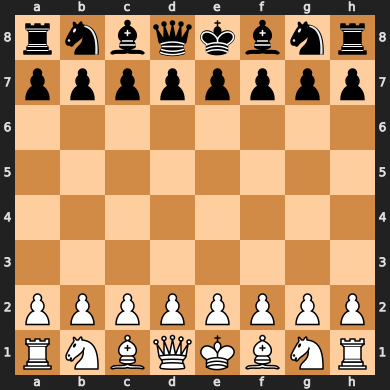

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/torch_weights.0.{}.pt'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

device: cuda


Move.from_uci('h2h3')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.6304394 , 0.6391056 , 0.63084096, 0.62613803, 0.67658573,
       0.6528    , 0.6368437 , 0.6232919 , 0.61065537, 0.63535315,
       0.63579774, 0.6533704 , 0.66291106, 0.6259107 , 0.60911256,
       0.64725924, 0.6515619 , 0.66914916, 0.6712408 , 0.6696851 ],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('h2h3'), 0.6765857338905334],
       [Move.from_uci('b2b4'), 0.6712408065795898],
       [Move.from_uci('a2a4'), 0.6696851253509521],
       [Move.from_uci('c2c4'), 0.6691491603851318],
       [Move.from_uci('h2h4'), 0.662911057472229],
       [Move.from_uci('a2a3'), 0.6533703804016113],
       [Move.from_uci('g2g3'), 0.6528000235557556],
       [Move.from_uci('d2d4'), 0.6515619158744812],
       [Move.from_uci('e2e4'), 0.6472592353820801],
       [Move.from_uci('g1f3'), 0.6391056180000305],
       [Move.from_uci('f2f3'), 0.6368436813354492],
       [Move.from_uci('b2b3'), 0.6357977390289307],
       [Move.from_uci('c2c3'), 0.635353147983551],
       [Move.from_uci('b1c3'), 0.6308409571647644],
       [Move.from_uci('g1h3'), 0.6304394006729126],
       [Move.from_uci('b1a3'), 0.6261380314826965],
       [Move.from_uci('g2g4'), 0.6259106993675232],
       [Move.from_uci('e2e3'), 0.6232919096946716],
       [Move.from_uci('d2d3'), 0.6106553673744202],
       [Move.f

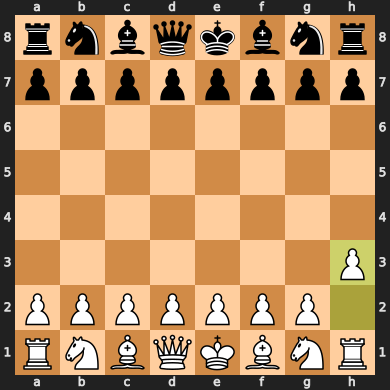

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.16

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 4/25 = 0.16 | weighted = 0.64
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 28 & 48 & 0.4255 & 0.6457 & c1c7 & 0.8579  \\
02 & f5d4 & 14 & 39 & 0.6579 & 0.3916 & d7d4 & 0.5435  \\
03 & e1d1 & 24 & 38 & 0.3784 & 0.6546 & f2f7 & 0.9049  \\
04 & b1b2 & 4 & 47 & 0.9348 & 0.6951 & d2d5 & 0.7181  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.5867 & c8c3 & 0.6564  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4464 & a3a2 & 0.4464  \\
07 & b7e4 & 8 & 33 & 0.7812 & 0.4113 & c7c5 & 0.4353  \\
08 & h7h6 & 14 & 39 & 0.6579 & 0.2908 & f8f3 & 0.5437  \\
09 & f3e2 & 29 & 35 & 0.1765 & 0.5866 & d2b4 & 0.6691  \\
10 & d5c3 & 17 & 41 & 0.6000 & 0.3660 & c7c3 & 0.5362  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9873 & g3f5 & 0.9873  \\
12 & c6d6 & 24 & 41 & 0.4250 & 0.2430 & e7e3 & 0.3910  \\
13 & c3d5 & 6 & 30 & 0.8276 & 0.7811 & f1f6 & 0.9162  \\
14 & b1b2 & 28 & 49 & 0.4375 & 0.7432 & d3g6 & 0.9132  \\
15 & d3f5 & 13 & 51 & 0.7600 & 0.8660 & e1e6 & 0.9344  \\
16 & b3b4 & 5 & 10 & 0.5556 & 0.4516 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.645702,c1c7,0.857892,28,48,0.425532
1,f5d4,0.391641,d7d4,0.543520,14,39,0.657895
2,e1d1,0.654597,f2f7,0.904896,24,38,0.378378
3,b1b2,0.695052,d2d5,0.718076,4,47,0.934783
4,g5c1,0.586749,c8c3,0.656351,2,48,0.978723
5,a3a2,0.446369,a3a2,0.446369,1,31,1.000000
6,b7e4,0.411339,c7c5,0.435294,8,33,0.781250
7,h7h6,0.290792,f8f3,0.543671,14,39,0.657895
8,f3e2,0.586626,d2b4,0.669106,29,35,0.176471
9,d5c3,0.366040,c7c3,0.536173,17,41,0.600000


In [12]:
epochs=30
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,data  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    
    if i<5:
        print("*"*80)
        print("Modelo {}".format(i))
        print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
        print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
        for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
            print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
        display(pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"]))
train_acc_model = np.array(deepbot.history['train']['acc'])
test_acc_model = np.array(deepbot.history['test']['acc'])


device: cuda
********************************************************************************
Modelo 1
Accuracy: 4/25 = 0.16 | weighted = 0.64
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 28 & 48 & 0.4255 & 0.6457 & c1c7 & 0.8579  \\
02 & f5d4 & 14 & 39 & 0.6579 & 0.3916 & d7d4 & 0.5435  \\
03 & e1d1 & 24 & 38 & 0.3784 & 0.6546 & f2f7 & 0.9049  \\
04 & b1b2 & 4 & 47 & 0.9348 & 0.6951 & d2d5 & 0.7181  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.5867 & c8c3 & 0.6564  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4464 & a3a2 & 0.4464  \\
07 & b7e4 & 8 & 33 & 0.7812 & 0.4113 & c7c5 & 0.4353  \\
08 & h7h6 & 14 & 39 & 0.6579 & 0.2908 & f8f3 & 0.5437  \\
09 & f3e2 & 29 & 35 & 0.1765 & 0.5866 & d2b4 & 0.6691  \\
10 & d5c3 & 17 & 41 & 0.6000 & 0.3660 & c7c3 & 0.5362  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9873 & g3f5 & 0.9873  \\
12 & c6d6 & 24 & 41 & 0.4250 & 0.2430 & e7e3 & 0.3910  \\
13 & c3d5 & 6 & 30 & 0.8276 & 0.7811 & f1f6 & 0.9162  \\
14 & b1b2 & 28 & 49 & 0.4375 & 0.7432 & d3g6 & 0.9

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.645702,c1c7,0.857892,28,48,0.425532
1,f5d4,0.391641,d7d4,0.543520,14,39,0.657895
2,e1d1,0.654597,f2f7,0.904896,24,38,0.378378
3,b1b2,0.695052,d2d5,0.718076,4,47,0.934783
4,g5c1,0.586749,c8c3,0.656351,2,48,0.978723
5,a3a2,0.446369,a3a2,0.446369,1,31,1.000000
6,b7e4,0.411339,c7c5,0.435294,8,33,0.781250
7,h7h6,0.290792,f8f3,0.543671,14,39,0.657895
8,f3e2,0.586626,d2b4,0.669106,29,35,0.176471
9,d5c3,0.366040,c7c3,0.536173,17,41,0.600000


device: cuda
********************************************************************************
Modelo 2
Accuracy: 6/25 = 0.24 | weighted = 0.7
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 7 & 48 & 0.8723 & 0.6703 & c1c7 & 0.9046  \\
02 & f5d4 & 18 & 39 & 0.5526 & 0.5238 & a5a3 & 0.7188  \\
03 & e1d1 & 21 & 38 & 0.4595 & 0.5257 & f2f7 & 0.8906  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7825 & b1b2 & 0.7825  \\
05 & g5c1 & 3 & 48 & 0.9574 & 0.3835 & c8c3 & 0.6265  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4850 & a3a2 & 0.4850  \\
07 & b7e4 & 3 & 33 & 0.9375 & 0.5125 & f6e4 & 0.5175  \\
08 & h7h6 & 17 & 39 & 0.5789 & 0.1274 & e1c1 & 0.4375  \\
09 & f3e2 & 18 & 35 & 0.5000 & 0.3988 & d2a5 & 0.5783  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.7681 & d5c3 & 0.7681  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9856 & g3f5 & 0.9856  \\
12 & c6d6 & 32 & 41 & 0.2250 & 0.0736 & e7e3 & 0.2172  \\
13 & c3d5 & 3 & 30 & 0.9310 & 0.9085 & f1f6 & 0.9840  \\
14 & b1b2 & 11 & 49 & 0.7917 & 0.6563 & d3g6 & 0.8656

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.670313,c1c7,0.904553,7,48,0.872340
1,f5d4,0.523755,a5a3,0.718821,18,39,0.552632
2,e1d1,0.525662,f2f7,0.890599,21,38,0.459459
3,b1b2,0.782481,b1b2,0.782481,1,47,1.000000
4,g5c1,0.383453,c8c3,0.626467,3,48,0.957447
5,a3a2,0.485008,a3a2,0.485008,1,31,1.000000
6,b7e4,0.512547,f6e4,0.517509,3,33,0.937500
7,h7h6,0.127406,e1c1,0.437458,17,39,0.578947
8,f3e2,0.398768,d2a5,0.578317,18,35,0.500000
9,d5c3,0.768081,d5c3,0.768081,1,41,1.000000


device: cuda
********************************************************************************
Modelo 3
Accuracy: 3/25 = 0.12 | weighted = 0.7
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 15 & 48 & 0.7021 & 0.6491 & c1c7 & 0.8680  \\
02 & f5d4 & 10 & 39 & 0.7632 & 0.6000 & a5a3 & 0.7682  \\
03 & e1d1 & 25 & 38 & 0.3514 & 0.4331 & f2f7 & 0.9078  \\
04 & b1b2 & 5 & 47 & 0.9130 & 0.6110 & e2c3 & 0.6643  \\
05 & g5c1 & 5 & 48 & 0.9149 & 0.6117 & c8c3 & 0.9032  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4709 & a3a2 & 0.4709  \\
07 & b7e4 & 6 & 33 & 0.8438 & 0.6299 & f6h7 & 0.6831  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.2408 & e1c1 & 0.5129  \\
09 & f3e2 & 23 & 35 & 0.3529 & 0.3827 & d2g5 & 0.6882  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.8779 & d5c3 & 0.8779  \\
11 & g3f5 & 4 & 35 & 0.9118 & 0.9851 & g3e4 & 0.9897  \\
12 & c6d6 & 32 & 41 & 0.2250 & 0.0315 & c6c2 & 0.1179  \\
13 & c3d5 & 2 & 30 & 0.9655 & 0.9494 & f1f6 & 0.9936  \\
14 & b1b2 & 5 & 49 & 0.9167 & 0.8446 & d3g6 & 0.8891

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.649051,c1c7,0.868016,15,48,0.702128
1,f5d4,0.600032,a5a3,0.768198,10,39,0.763158
2,e1d1,0.433136,f2f7,0.907793,25,38,0.351351
3,b1b2,0.611042,e2c3,0.664325,5,47,0.913043
4,g5c1,0.611670,c8c3,0.903210,5,48,0.914894
5,a3a2,0.470912,a3a2,0.470912,1,31,1.000000
6,b7e4,0.629897,f6h7,0.683105,6,33,0.843750
7,h7h6,0.240783,e1c1,0.512867,11,39,0.736842
8,f3e2,0.382698,d2g5,0.688245,23,35,0.352941
9,d5c3,0.877923,d5c3,0.877923,1,41,1.000000


device: cuda
********************************************************************************
Modelo 4
Accuracy: 4/25 = 0.16 | weighted = 0.68
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 6 & 48 & 0.8936 & 0.6913 & c1c7 & 0.8416  \\
02 & f5d4 & 17 & 39 & 0.5789 & 0.6372 & a5d5 & 0.9028  \\
03 & e1d1 & 22 & 38 & 0.4324 & 0.6882 & f2f7 & 0.9722  \\
04 & b1b2 & 6 & 47 & 0.8913 & 0.6275 & e2c3 & 0.6982  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.3665 & c8c3 & 0.7787  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.2184 & a3a2 & 0.2184  \\
07 & b7e4 & 8 & 33 & 0.7812 & 0.5116 & f8e8 & 0.5934  \\
08 & h7h6 & 5 & 39 & 0.8947 & 0.3489 & e1c1 & 0.6294  \\
09 & f3e2 & 15 & 35 & 0.5882 & 0.2706 & d2h6 & 0.6569  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.8522 & d5c3 & 0.8522  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9949 & g3f5 & 0.9949  \\
12 & c6d6 & 13 & 41 & 0.7000 & 0.0328 & e7e1 & 0.0780  \\
13 & c3d5 & 2 & 30 & 0.9655 & 0.9891 & f1f6 & 0.9956  \\
14 & b1b2 & 16 & 49 & 0.6875 & 0.8493 & h2h4 & 0.9309

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.691343,c1c7,0.841624,6,48,0.893617
1,f5d4,0.637219,a5d5,0.902763,17,39,0.578947
2,e1d1,0.688213,f2f7,0.972243,22,38,0.432432
3,b1b2,0.627533,e2c3,0.698189,6,47,0.891304
4,g5c1,0.366471,c8c3,0.778674,2,48,0.978723
5,a3a2,0.218430,a3a2,0.218430,1,31,1.000000
6,b7e4,0.511564,f8e8,0.593442,8,33,0.781250
7,h7h6,0.348940,e1c1,0.629443,5,39,0.894737
8,f3e2,0.270573,d2h6,0.656916,15,35,0.588235
9,d5c3,0.852237,d5c3,0.852237,1,41,1.000000


device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda


In [13]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 2/25 = 0.08 | weighted = 0.54
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 22 & 48 & 0.5532 & 0.0972 & d1g4 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 25 & 38 & 0.3514 & 0.0017 & g2g4 & 1.0000  \\
04 & b1b2 & 7 & 47 & 0.8696 & 0.7656 & f3f4 & 1.0000  \\
05 & g5c1 & 1 & 48 & 1.0000 & 0.9918 & g5c1 & 0.9918  \\
06 & a3a2 & 23 & 31 & 0.2667 & 0.0017 & d7c5 & 0.5343  \\
07 & b7e4 & 6 & 33 & 0.8438 & 0.8181 & g8h7 & 0.9888  \\
08 & h7h6 & 5 & 39 & 0.8947 & 0.9970 & f8f1 & 0.9999  \\
09 & f3e2 & 30 & 35 & 0.1471 & 0.0053 & d2h6 & 1.0000  \\
10 & d5c3 & 3 & 41 & 0.9500 & 0.9874 & c7c3 & 1.0000  \\
11 & g3f5 & 16 & 35 & 0.5588 & 1.0000 & c7e5 & 1.0000  \\
12 & c6d6 & 38 & 41 & 0.0750 & 0.0000 & b6d5 & 0.4865  \\
13 & c3d5 & 12 & 30 & 0.6207 & 1.0000 & d3b1 & 1.0000  \\
14 & b1b2 & 44 & 49 & 0.1042 & 0.0000 & d3a6 & 1.0000  \\
15 & d3f5 & 28 & 51 & 0.4600 & 0.3487 & e1e6 & 1.0000  \\
16 & b3b4 & 4 & 10 & 0.6667 & 0.9997 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,9.715671e-02,d1g4,0.999995,22,48,0.553191
1,f5d4,9.999988e-01,f5d4,0.999999,1,39,1.000000
2,e1d1,1.710054e-03,g2g4,0.999997,25,38,0.351351
3,b1b2,7.656334e-01,f3f4,0.999999,7,47,0.869565
4,g5c1,9.917664e-01,g5c1,0.991766,1,48,1.000000
5,a3a2,1.689184e-03,d7c5,0.534305,23,31,0.266667
6,b7e4,8.181261e-01,g8h7,0.988765,6,33,0.843750
7,h7h6,9.969686e-01,f8f1,0.999945,5,39,0.894737
8,f3e2,5.283408e-03,d2h6,0.999969,30,35,0.147059
9,d5c3,9.874300e-01,c7c3,0.999959,3,41,0.950000


In [14]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


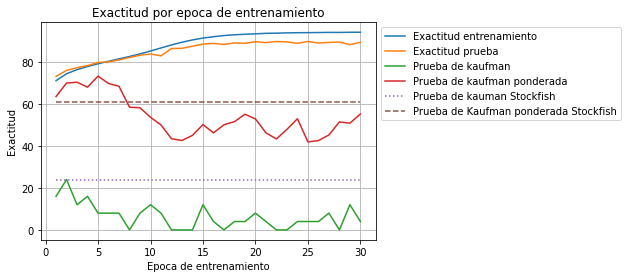

In [15]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [16]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 71.11 & 73.13 & 16.00 & 63.53 \\
02 & 74.41 & 75.99 & 24.00 & 69.96 \\
03 & 76.36 & 77.31 & 12.00 & 70.37 \\
04 & 77.82 & 78.27 & 16.00 & 68.01 \\
05 & 79.15 & 79.78 & 8.00 & 73.26 \\
06 & 80.34 & 80.09 & 8.00 & 69.77 \\
07 & 81.48 & 80.98 & 8.00 & 68.41 \\
08 & 82.63 & 82.15 & 0.00 & 58.46 \\
09 & 83.86 & 83.23 & 8.00 & 58.20 \\
10 & 85.22 & 83.81 & 12.00 & 53.66 \\
11 & 86.70 & 82.92 & 8.00 & 50.02 \\
12 & 88.12 & 86.41 & 0.00 & 43.43 \\
13 & 89.42 & 86.52 & 0.00 & 42.63 \\
14 & 90.52 & 87.53 & 0.00 & 45.02 \\
15 & 91.41 & 88.54 & 12.00 & 50.19 \\
16 & 92.05 & 88.86 & 4.00 & 46.24 \\
17 & 92.60 & 88.36 & 0.00 & 50.09 \\
18 & 92.95 & 89.08 & 4.00 & 51.59 \\
19 & 93.22 & 88.90 & 4.00 & 55.11 \\
20 & 93.42 & 89.67 & 8.00 & 52.86 \\
21 & 93.66 & 89.24 & 4.00 & 46.23 \\
22 & 93.73 & 89.76 & 0.00 & 43.35 \\
23 & 93.88 & 89.58 & 0.00 & 47.92 \\
24 & 93.94 & 88.91 & 4.

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.711104,0.731345,0.16,0.635310
2,0.744096,0.759940,0.24,0.699588
3,0.763553,0.773059,0.12,0.703654
4,0.778242,0.782711,0.16,0.680050
5,0.791494,0.797757,0.08,0.732561
6,0.803414,0.800911,0.08,0.697700
7,0.814778,0.809787,0.08,0.684128
8,0.826266,0.821454,0.00,0.584589
9,0.838569,0.832343,0.08,0.581989
10,0.852200,0.838121,0.12,0.536584
